# SUPERVISED LEARNING

# Data preprocessing and Logistic Regression for Binary Classification

### Principal techniques for preprocessing data:

**Handling missing values**

**Categorical features transformation**

**Stratification**

**Classes Balancing**

**Scaling**

Librarias we need:
+ numpy
+ sklearn
+ pandas
+ matplotlib

## Logistic Regression theory

Logistic Regression predicts the probabilities of an object belonging to each class. The sum of the Logistic Regression responses on one object for all classes is equal to one.
$$ \sum_{k=1}^K p_{ik} = 1, \quad p_k \equiv P\,(y_i = k \mid x_i, \theta), $$
where:
- $p_{ik}$ - the probability of belonging $x_i$ object from the sample $X$ to the class $k$ 
- $\theta$ - internal algorithm parameters that are set in the learning process, in case of logistic regression - $w, b$
In case of Binary Classification, it is enough to calculate the probability of object belonging to one of the classes:
$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$
Parameters $w$ and $b$ are found as solutions to the optimization problem:

L2-regularization:

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

where $C$ - is a standard model hyperparameter that controls how much we allow the model to adapt to the data

## Data load and review

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from warnings import filterwarnings 
filterwarnings('ignore')

Objective: according to 38 criteria associated with the grant application (the field of research of scientists, information on their academic background, the size of the grant, the area in which it is issued) to predict whether the application will be accepted. The dataset includes information on 6,000 grant applications that were submitted to the University of Melbourne from 2004 to 2008.
The full version of the data with larger number of features can be found at https://www.kaggle.com/c/unimelb.

In [3]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

In [4]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [5]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


From the properties of this model it follows that::
- all $X$ must be numerical data (if there are categories among them, they need to be converted into real numbers in some way)
- there should be no missing values

Therefore, the first step in the preprocessing of dataset for logistic regression will be the coding of categorical features, as well as the removal or interpretation of missing values.

In [6]:
data.columns

Index(['Grant.Status', 'Sponsor.Code', 'Grant.Category.Code',
       'Contract.Value.Band...see.note.A', 'RFCD.Code.1', 'RFCD.Percentage.1',
       'RFCD.Code.2', 'RFCD.Percentage.2', 'RFCD.Code.3', 'RFCD.Percentage.3',
       'RFCD.Code.4', 'RFCD.Percentage.4', 'RFCD.Code.5', 'RFCD.Percentage.5',
       'SEO.Code.1', 'SEO.Percentage.1', 'SEO.Code.2', 'SEO.Percentage.2',
       'SEO.Code.3', 'SEO.Percentage.3', 'SEO.Code.4', 'SEO.Percentage.4',
       'SEO.Code.5', 'SEO.Percentage.5', 'Person.ID.1', 'Role.1',
       'Year.of.Birth.1', 'Country.of.Birth.1', 'Home.Language.1',
       'Dept.No..1', 'Faculty.No..1', 'With.PHD.1',
       'No..of.Years.in.Uni.at.Time.of.Grant.1',
       'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1',
       'A..1', 'A.1', 'B.1', 'C.1'],
      dtype='object')

The dataset has both numeric and categorical attributes

In [7]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

It also contains missing values. The obvious solution would be to exclude all data that has at least one value missing.

In [8]:
data.dropna().shape

(213, 39)

If we do this, then we will throw out almost all the data, and this is not siutable. There are several ways to interpret missing values.

For real features:
- replace with $0$
- replace with Mean

For categorical features:
- interpret the missing value as another one category

## 1. Handling Missing Values

In [9]:
# NUMERIC DATA
# We will try both methods to treat missing values

X_num = X[numeric_cols]
X_real_mean = (X_num.fillna(X_num.mean())).round(0)
X_real_zeros = X_num.fillna(0)
X_real_mean.head()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0


In [10]:
# CATEGORICAL DATA

X_obj = (X[categorical_cols]).fillna('NA')
X_cat = X_obj.astype('str')    
X_cat.head()

,RFCD.Code.4,Role.1,RFCD.Code.1,Country.of.Birth.1,C.1,SEO.Code.5,Person.ID.1,Sponsor.Code,RFCD.Code.5,A..1,...,B.1,With.PHD.1,RFCD.Code.2,SEO.Code.3,A.1,Dept.No..1,SEO.Code.1,No..of.Years.in.Uni.at.Time.of.Grant.1,RFCD.Code.3,Home.Language.1
0,0.0,CHIEF_INVESTIGATOR,230202.0,Australia,0.0,0.0,493297.0,21A,0.0,0.0,...,2.0,Yes,230203.0,0.0,4.0,3098.0,780101.0,>=0 to 5,230204.0,NA
1,0.0,CHIEF_INVESTIGATOR,320801.0,Australia,0.0,0.0,330592.0,4D,0.0,0.0,...,0.0,Yes,0.0,0.0,2.0,2553.0,730112.0,>=0 to 5,0.0,NA
2,0.0,CHIEF_INVESTIGATOR,320602.0,Australia,0.0,0.0,66887.0,NA,0.0,0.0,...,2.0,NA,321004.0,730108.0,7.0,2813.0,730203.0,Less than 0,321015.0,NA
3,0.0,CHIEF_INVESTIGATOR,291503.0,Great Britain,1.0,0.0,63812.0,51C,0.0,5.0,...,9.0,NA,321402.0,0.0,6.0,2553.0,730114.0,more than 15,0.0,NA
4,0.0,CHIEF_INVESTIGATOR,380107.0,Australia,0.0,0.0,13687.0,24D,0.0,0.0,...,0.0,NA,0.0,0.0,0.0,2923.0,730108.0,Less than 0,0.0,NA


## 2. Categorical features converting

To use the regression model, it is necessary to convert categorical features into the real ones. Consider the principal method of transforming categorical features into real ones: One-hot encoding. Its idea bases on the transforming the categorical attribute using binary code: each category is a set of zeros and ones.
Let's see how this method works on a simple data set.

In [11]:
#  EXAMPLE

from sklearn.preprocessing import OneHotEncoder
example_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                               'nationality': ['American', 'European', 'Asian', 'European']})
print('Categoriacal data:', example_data.shape, '\n')
print(example_data)

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(example_data)
encoded_data = encoder.transform(example_data).toarray()

print('\nEncoded data:', encoded_data.shape, '\n')
print(encoded_data)

Categoriacal data: (4, 2) 

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Encoded data: (4, 5) 

[[0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]]


As we can see, first 3 columns encode information about country, and another 2 - about sex. It can also be seen from the example that coding features significantly increases their number, but completely saves information, including about missing values (they simply becomes one of the binary features in the converted data):

In [12]:
# Apply OneHotEncoder to our categorical data

encoder = OneHotEncoder(handle_unknown='error')
encoder.fit(X_cat)
X_cat_oh = encoder.transform(X_cat).toarray()
print('Normal shape:', X_cat.shape, 'Encoder shape:', X_cat_oh.shape)

Normal shape: (6000, 25) Encoder shape: (6000, 5593)


### Data Split

In [13]:
# Train size 0.7; Test size 0.3

from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

## 3. Comparison of filling Means with filling Zeros

In [14]:
# Let's compose two samples of data:

# TRAIN
X0 = np.hstack((X_train_real_zeros, X_train_cat_oh))
X1 = np.hstack((X_train_real_mean, X_train_cat_oh))
print(X_train_real_zeros.shape, '+', X_train_cat_oh.shape, '=', X0.shape)

# TEST
x0 = np.hstack((X_test_real_zeros, X_test_cat_oh))
x1 = np.hstack((X_test_real_mean, X_test_cat_oh))
print(X_test_real_zeros.shape, '+', X_test_cat_oh.shape, '=', x0.shape)

(4200, 13) + (4200, 5593) = (4200, 5606)
(1800, 13) + (1800, 5593) = (1800, 5606)


Now we can learn Logistic Regression using the sklearn library functional for selecting model hyperparameters _GridSerchCV_ with cross validation number of folds 3. For comparison of methods to fill missing real values, we will use ROC-AUC metrics.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

In [16]:
estimator = LogisticRegression(random_state=1)
optimizer_0 = GridSearchCV(estimator, param_grid, cv = 3)
optimizer_1 = GridSearchCV(estimator, param_grid, cv = 3)

In [17]:
%%time
optimizer_0.fit(X0, y_train) 

CPU times: user 9.27 s, sys: 289 ms, total: 9.56 s
Wall time: 4.95 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
# Filling with Zeros
print('best C param', optimizer_0.best_params_)
print('best score', optimizer_0.best_score_)   # by default is acuuracy

best C param {'C': 0.05}
best score 0.794047619047619


In [19]:
%%time
optimizer_1.fit(X1, y_train)

CPU times: user 9.02 s, sys: 291 ms, total: 9.31 s
Wall time: 4.83 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
# Filling with Means
print('best C param', optimizer_1.best_params_)
print('best score', optimizer_1.best_score_)   # by default is acuuracy

best C param {'C': 0.1}
best score 0.7947619047619048


In [21]:
# Plot Score / C

def plot_scores(optimizer):
    item0 = np.array(optimizer.param_grid['C'])
    item1 = optimizer.cv_results_['mean_test_score']
    scores = [item0,item1]
    
    plt.semilogx(scores[0], scores[1])
    plt.plot(scores[0], scores[1], 'ko',label = scores[0])
    plt.legend()
    plt.show()

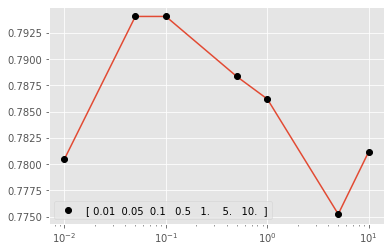

In [22]:
# X0
plot_scores(optimizer_0)

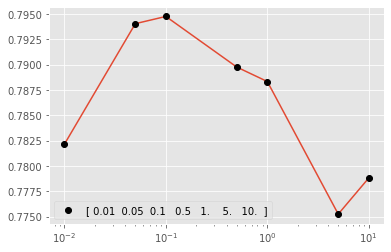

In [23]:
# X1
plot_scores(optimizer_1)

In [24]:
# AUC using real ZEROS

y0 = optimizer_0.predict(x0)                   # Just labels [0,1]
y0_prob = optimizer_0.predict_proba(x0)        # Probabilities of [0,1]

from sklearn import metrics 
AUC0 = metrics.roc_auc_score(y_test, y0)
AUC0_ = metrics.roc_auc_score(y_test, y0_prob[:,1])
print(f'AUC_labels: {AUC0} \nAUC_predict: {AUC0_}')

AUC_labels: 0.809035068941324 
AUC_predict: 0.8845061133377302


In [25]:
# AUC using real MEAN

y1 = optimizer_1.predict(x1)                   # Just labels [0,1]
y1_prob = optimizer_1.predict_proba(x1)        # Probabilities of [0,1]
AUC1 = metrics.roc_auc_score(y_test, y1)
AUC1_ = metrics.roc_auc_score(y_test, y1_prob[:,1])
print(f'AUC_labels: {AUC1} \nAUC_predict: {AUC1_}')

AUC_labels: 0.8062775397172063 
AUC_predict: 0.8877245712744277


In [26]:
print(f'ROC-AUC Zeros: {AUC0_} \nROC-AUC Means: {AUC1_}')

ROC-AUC Zeros: 0.8845061133377302 
ROC-AUC Means: 0.8877245712744277


## 4. Scaling real values

Let's try look at the data itself:

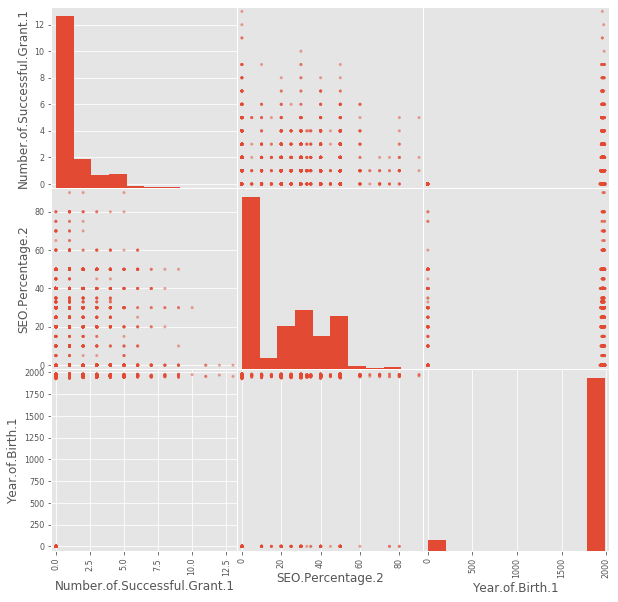

In [27]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

As can be seen from the graphs, different features are very different from each other in absolute values. In case of Linear Regression that does not affect the quality of the trained model, as smaller features values have great weight, but the use of regularization, which penalizes the model for big weight, regression, as a rule, begins to work less.
Thats why, when Logistic Regression has used, scaling is necesary.
One of the way to scaling is:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}$$

In [28]:
X_train_real = X_train_real_mean
X_test_real = X_test_real_mean

In [29]:
# SCALED REAL X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_real)

X_train_real_scaled = scaler.transform(X_train_real)
X_test_real_scaled = scaler.transform(X_test_real)

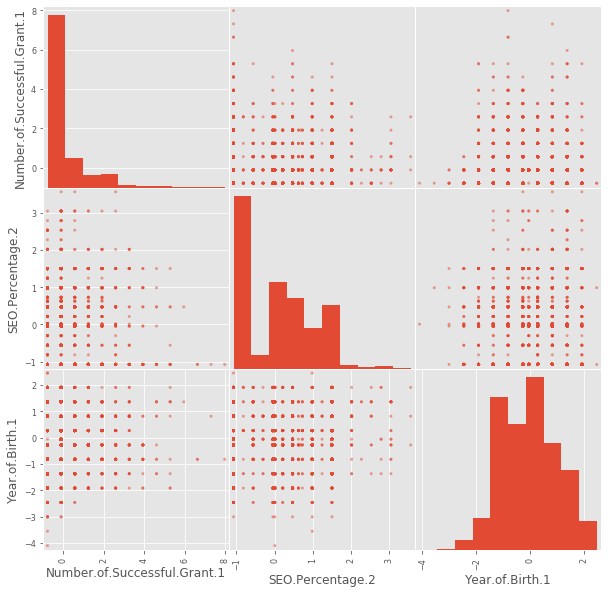

In [30]:
# Repeat the diagrams for scaling values

data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Now we can compare the quality of the classification before and after scaling

In [32]:
X_train = np.hstack((X_train_real_scaled, X_train_cat_oh))      # TRAIN
X_test = np.hstack((X_test_real_scaled, X_test_cat_oh))         # TEST

In [33]:
optimizer_scal = GridSearchCV(estimator, param_grid, cv = 3)

In [34]:
%%time
optimizer_scal.fit(X_train, y_train) 

CPU times: user 5.63 s, sys: 323 ms, total: 5.95 s
Wall time: 3.34 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
# Scaling data
print('best C param', optimizer_scal.best_params_)
print('best score', optimizer_scal.best_score_)   # accuracy by default

best C param {'C': 0.1}
best score 0.7954761904761904


In [36]:
y_scal = optimizer_scal.predict(X_test)                   # Just labels [0,1]
y_prob_scal = optimizer_scal.predict_proba(X_test)        # Probabilities of [0,1]

AUC_scal = metrics.roc_auc_score(y_test, y_scal)
AUC_scal_ = metrics.roc_auc_score(y_test, y_prob_scal[:,1])
print(f'AUC_labels: {AUC_scal} \nAUC_predict: {AUC_scal_}')

AUC_labels: 0.8079214156760308 
AUC_predict: 0.8879349280023164


In [37]:
print(f'ROC-AUC before scaling: {AUC1_} \nROC-AUC after scaling: {AUC_scal_}')

ROC-AUC before scaling: 0.8877245712744277 
ROC-AUC after scaling: 0.8879349280023164


Althought the estimation didn't improve too much, this result is more reliable.

## 5. Class balancing

Classification algorithms can be very sensitive to unbalanced classes. Let's see if the classes are balanced in our training set:

In [38]:
print('0 train', np.sum(y_train==0))
print('1 train', np.sum(y_train==1))
print('0 test', np.sum(y_test==0))
print('1 test', np.sum(y_test==1))

0 train 2316
1 train 1884
0 test 943
1 test 857


It is seen that the classes are not balanced.
We can solve the situation in different ways:
- give objects of a minority class more weight when training the classifier _(LogisticRegression(class_weight='balanced')...)_
- re-sample the objects of the minority class until the number of objects in both classes is equal

### 5.1. Class balancing by indicate it in classifier

In [39]:
optimizer_balanc = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)

In [40]:
%%time
optimizer_balanc.fit(X_train, y_train) 

CPU times: user 274 ms, sys: 160 ms, total: 434 ms
Wall time: 7.1 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
print('best C param', optimizer_balanc.best_params_)
print('best score', optimizer_balanc.best_score_)

best C param {'C': 0.05}
best score 0.7876190476190477


In [42]:
y_balanc = optimizer_balanc.predict(X_test)                   # Just labels [0,1]
y_prob_balanc = optimizer_balanc.predict_proba(X_test)        # Probabilities of [0,1]
AUC_balanc = metrics.roc_auc_score(y_test, y_balanc)

AUC_balanc_ = metrics.roc_auc_score(y_test, y_prob_balanc[:,1])
print(f'AUC_labels: {AUC_balanc} \nAUC_predict: {AUC_balanc_}')

AUC_labels: 0.8040558014529462 
AUC_predict: 0.885846209433633


### 5.2. Class balancing by manual equalization of classes

In [43]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
add_train_num = np.sum(y_train==0) - np.sum(y_train==1)   # how much we need to balance class
X_train_to_add = np.zeros((add_train_num, X_train.shape[1]))
y_train_to_add = np.zeros((add_train_num,1))

for i in range(add_train_num):
    np.random.seed(i)
    indice_to_add = np.random.randint(np.sum(y_train==1))  #1 random de clase 1
    X_train_to_add[i] = (X_train[np.where(y_train==1)])[indice_to_add]
    y_train_to_add[i] = y_train[np.where(y_train==1)][indice_to_add]

In [45]:
add_test_num = np.sum(y_test==0) - np.sum(y_test==1)
X_test_to_add = np.zeros((add_test_num, X_test.shape[1]))
y_test_to_add = np.zeros((add_test_num, 1))

for i in range(add_test_num):
    np.random.seed(i)
    indice_to_add = np.random.randint(np.sum(y_test==1))  #1 random de clase 1
    X_test_to_add[i] = (X_test[np.where(y_test==1)])[indice_to_add]
    y_test_to_add[i] = y_test[np.where(y_test==1)][indice_to_add]

In [46]:
y_train_new = y_train[:, np.newaxis]
y_test_new = y_test[:, np.newaxis]

In [47]:
X_train_eq = np.vstack((X_train, X_train_to_add)) 
X_test_eq = np.vstack((X_test, X_test_to_add)) 
y_train_eq = np.vstack((y_train_new, y_train_to_add)) 
y_test_eq = np.vstack((y_test_new, y_test_to_add))

In [48]:
optimizer_eq = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)

In [49]:
%%time
optimizer_eq.fit(X_train_eq, y_train_eq) 

CPU times: user 378 ms, sys: 110 ms, total: 488 ms
Wall time: 6.13 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
print('best C param', optimizer_eq.best_params_)
print('best score', optimizer_eq.best_score_)

best C param {'C': 1}
best score 0.8035405872193437


In [51]:
y_eq = optimizer_eq.predict(X_test_eq)                   # Just labels [0,1]
y_prob_eq = optimizer_eq.predict_proba(X_test_eq)        # Probabilities to [0,1]
AUC_eq = metrics.roc_auc_score(y_test_eq, y_eq)
AUC_eq_ = metrics.roc_auc_score(y_test_eq, y_prob_eq[:,1])
print(f'AUC_labels: {AUC_eq} \nAUC_predict: {AUC_eq_}')

AUC_labels: 0.8160127253446448 
AUC_predict: 0.886881514626387


In [52]:
print(f'ROC-AUC balance 1: {AUC_balanc_} \nROC-AUC balance 2: {AUC_eq_}')

ROC-AUC balance 1: 0.885846209433633 
ROC-AUC balance 2: 0.886881514626387


## 6. Stratification of data

We already know that the Logistic Regression algorithm is sensitive to class balancing in the training set. The classifier metrics on the test would make much more sense if the objects of different classes were divided equally in the train and test samples. We reorganize the samples and calculate the new metrics:

In [53]:
# Before Stratification

print('0 class ratio: ', np.sum(y_train==0)/np.sum(y_test==0))
print('1 class ratio: ', np.sum(y_train==1)/np.sum(y_test==1))

0 class ratio:  2.4559915164369035
1 class ratio:  2.1983663943990663


Let's split the data again

In [54]:
(X_train_real_zeros,         # pandas dtype
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros.to_numpy(), y.to_numpy(), 
                                     test_size=0.3, 
                                     stratify=y, random_state=0)
(X_train_real_mean,           # pandas dtype
 X_test_real_mean) = train_test_split(X_real_mean.to_numpy(), 
                                      test_size=0.3, 
                                      stratify=y, random_state=0)
(X_train_cat_oh,              # nparray dtype
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   stratify=y, random_state=0)

In [55]:
X_train_real = X_train_real_mean
X_test_real = X_test_real_mean

In [56]:
# Scale again

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_real)
X_train_real_scaled = scaler.transform(X_train_real)
X_test_real_scaled = scaler.transform(X_test_real)

X_train = np.hstack((X_train_real_scaled, X_train_cat_oh))  
X_test = np.hstack((X_test_real_scaled, X_test_cat_oh))  

In [57]:
optimizer_str = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)

In [58]:
%%time
optimizer_str.fit(X_train, y_train) 

CPU times: user 345 ms, sys: 153 ms, total: 498 ms
Wall time: 7.19 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print('best C param', optimizer_str.best_params_)
print('best score', optimizer_str.best_score_)

best C param {'C': 0.1}
best score 0.8045238095238095


In [60]:
y_str = optimizer_str.predict(X_test)                   # Just labels [0,1]
y_prob_str = optimizer_str.predict_proba(X_test)        # Probabilities of [0,1]
AUC_str = metrics.roc_auc_score(y_test, y_str)
AUC_str_ = metrics.roc_auc_score(y_test, y_prob_str[:,1])
print(f'AUC_labels: {AUC_str} \nAUC_predict: {AUC_str_}')

AUC_labels: 0.7879890436314241 
AUC_predict: 0.876940501246399


In [61]:
# After Stratification

print('0 class ratio: ', np.sum(y_train==0)/np.sum(y_test==0))
print('1 class ratio: ', np.sum(y_train==1)/np.sum(y_test==1))

0 class ratio:  2.3323108384458076
1 class ratio:  2.334549878345499


In [62]:
print(f'ROC-AUC before stratification: {AUC_eq_} \nROC-AUC after stratification: {AUC_str_}')

ROC-AUC before stratification: 0.886881514626387 
ROC-AUC after stratification: 0.876940501246399


## 7. Features transformation

There are different methods of transformation of features, which allow using linear methods of getting more complex parting surfaces. The most basic is the Polynomial transformation. The idea is that in addition to the features themselves, you additionally include a set of all degree polynomials that can be built from them. For the case 𝑝 = 2, the transformation is as follows:
$$ \phi(x_i) = [x_{i,1}^2, ..., x_{i,D}^2, x_{i,1}x_{i,2}, ..., x_{i,D} x_{i,D-1}, x_{i,1}, ..., x_{i,D}, 1] $$

But at the same time, this method contributes to a stronger ability to overfitting due to the rapid growth in the number of features with an increase of $p$ degree.

In [63]:
# Transformation using polynomial features of degree p = 2

from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(2)
X_train_real_poly = poly_transform.fit_transform(X_train_real)     # Just real numeric values
X_test_real_poly = poly_transform.transform(X_test_real)
X_train_real_poly.shape

(4200, 105)

In [64]:
# Scaling again

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_real_poly)
X_train_real_scaled = scaler.transform(X_train_real_poly)
X_test_real_scaled = scaler.transform(X_test_real_poly)


In [65]:
X_train_poly = np.hstack((X_train_real_scaled, X_train_cat_oh))  
X_test_poly = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [66]:
optimizer_poly = GridSearchCV(LogisticRegression(class_weight='balanced',fit_intercept=False), param_grid, \
                              cv=cv, n_jobs=-1)

In [67]:
%%time
optimizer_poly.fit(X_train_poly, y_train) 

CPU times: user 757 ms, sys: 205 ms, total: 962 ms
Wall time: 11.5 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=False,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
print('best C param', optimizer_poly.best_params_)
print('best score', optimizer_poly.best_score_)

best C param {'C': 0.1}
best score 0.8095238095238095


In [69]:
y_poly = optimizer_poly.predict(X_test_poly)                   # Just labels [0,1]
y_prob_poly = optimizer_poly.predict_proba(X_test_poly)        # Probabilities of [0,1]
AUC_poly = metrics.roc_auc_score(y_test, y_poly)
AUC_poly_ = metrics.roc_auc_score(y_test, y_prob_poly[:,1])
print(f'AUC_labels: {AUC_poly} \nAUC_predict: {AUC_poly_}')

AUC_labels: 0.800038810024928 
AUC_predict: 0.8855060727737725


## 8.  Lasso Regression

We can also apply L1-regularization (Lasso) instead of L2-regularization for Logistic Regression, that will lead to the selection of features.

In [70]:
clf_L1 = LogisticRegression(penalty = 'l1', random_state=0, class_weight='balanced')

In [71]:
optimizer_Lasso = GridSearchCV(clf_L1, param_grid, cv=cv, n_jobs=-1)

In [72]:
%%time
optimizer_Lasso.fit(X_train, y_train) 

CPU times: user 237 ms, sys: 119 ms, total: 356 ms
Wall time: 6.86 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
y_L1 = optimizer_Lasso.predict(X_test)                   # Just labels [0,1]
y_prob_L1 = optimizer_Lasso.predict_proba(X_test)        # Probabilities of [0,1]
AUC_L1 = metrics.roc_auc_score(y_test, y_L1)
AUC_L1_ = metrics.roc_auc_score(y_test, y_prob_L1[:,1])
print(f'AUC_labels: {AUC_L1} \nAUC_predict: {AUC_L1_}')

AUC_labels: 0.7901310584687953 
AUC_predict: 0.8781520706143429


In [74]:
optimizer_Lasso.best_params_

{'C': 0.5}

In [75]:
clf_L1 = LogisticRegression(penalty = 'l1', C = 0.5, random_state=0, class_weight='balanced')

In [76]:
clf_L1.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_clf = clf_L1.predict(X_test)
y_prob_clf = clf_L1.predict_proba(X_test) 

In [78]:
#clf_L1.intercept_   # -> 0

# Features weights
w = clf_L1.coef_

Populating the interactive namespace from numpy and matplotlib


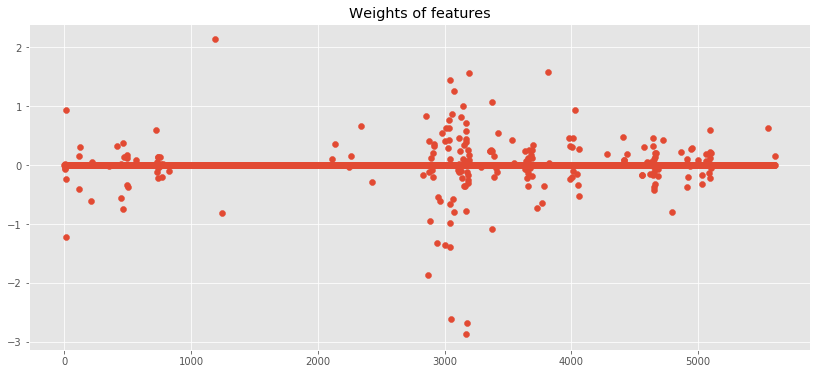

In [79]:
%pylab inline
plt.figure(figsize=(14, 6))
plt.scatter(linspace(0, w.shape[1], w.shape[1]),w)
plt.title('Weights of features')
plt.show()

Let's find which real feautures have 0 weights, i.e. they are not significant for predictive model

In [80]:
w_real = w[:,:13]  # first 13 columns have real features
index_0 = np.where(w_real[0] == 0)
print(index_0)

(array([0, 1, 5, 6, 7, 9]),)


In [81]:
for i in range(13):
    print(numeric_cols[i], "  ", w_real[0][i])

RFCD.Percentage.1    0.0
RFCD.Percentage.2    0.0
RFCD.Percentage.3    -0.05702792669872976
RFCD.Percentage.4    -0.06302498653277071
RFCD.Percentage.5    -0.016797675457523024
SEO.Percentage.1    0.0
SEO.Percentage.2    0.0
SEO.Percentage.3    0.0
SEO.Percentage.4    0.0231377192461051
SEO.Percentage.5    0.0
Year.of.Birth.1    -0.23796768462561285
Number.of.Successful.Grant.1    0.9385332416955696
Number.of.Unsuccessful.Grant.1    -1.228085104801918


Some of these preprocessing data techniques are also valid for other Machine Learning methods.